<a href="https://colab.research.google.com/github/heinohen/tko_7095_i2hlt/blob/main/week6_ex2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TASK 12: Analogy evaluation

Read in the analogy tuples from the file

In [1]:
!wget https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt

--2024-04-20 06:29:15--  https://raw.githubusercontent.com/nicholas-leonard/word2vec/master/questions-words.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 603955 (590K) [text/plain]
Saving to: ‘questions-words.txt’

questions-words.txt 100%[===================>] 589.80K  --.-KB/s    in 0.05s   

2024-04-20 06:29:15 (12.1 MB/s) - ‘questions-words.txt’ saved [603955/603955]



In [2]:
!wget http://dl.turkunlp.org/TKO_7095_2023/12.zip

--2024-04-20 06:29:15--  http://dl.turkunlp.org/TKO_7095_2023/12.zip
Resolving dl.turkunlp.org (dl.turkunlp.org)... 195.148.30.23
Connecting to dl.turkunlp.org (dl.turkunlp.org)|195.148.30.23|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 613577258 (585M) [application/zip]
Saving to: ‘12.zip’

12.zip              100%[===================>] 585.15M  20.7MB/s    in 29s     

2024-04-20 06:29:44 (20.3 MB/s) - ‘12.zip’ saved [613577258/613577258]



In [3]:
!unzip -o 12.zip

Archive:  12.zip
  inflating: meta.json               
  inflating: model.bin               
  inflating: model.txt               
  inflating: README                  


In [4]:
import gensim
from gensim.models import KeyedVectors

wv_emb_en = KeyedVectors.load_word2vec_format('model.bin', limit = 100000, binary = True) # same principle as ex. before

In [5]:
#012
#: capital-common-countries
#Athens Greece Baghdad Iraq
#Athens Greece Bangkok Thailand
#Athens Greece Beijing China
#...

#012
#: capital-world
#Abuja Nigeria Accra Ghana
#Abuja Nigeria Algiers Algeria
#Abuja Nigeria Amman Jordan
#...

#012
#: currency
#Algeria dinar Angola kwanza
#Algeria dinar Argentina peso
#Algeria dinar Armenia dram


In [15]:
## WORKFLOW ##
# 1) create dict to store all 14
# 2) line by line for file
# 3) looking at above see that index 2 start of actual taskname
# 4) format it and create dict entry
# 5) create a list of tuples 'taskitems' to store in dict under key == 'taskname'
## END ##

# 1)
task_dict = dict() # key == task, value == list of tuples

fname = 'questions-words.txt'
counter = 0

with open(fname) as f:
  # 2)
  for r in f:
    if not r:
      continue # skip empty
    # 3)
    if r.startswith(":"):
      counter += 1
      print(counter) # if we are at start of a task, create entry for dict

      #012 indexes
      #: capital-common-countries

      # 4)
      task_name = r[2:].strip('\n')
      print(task_name)
      taskitems = []
      # 5)
      task_dict[task_name] = taskitems

    else: # append to the task's list
      #012 indexes
      #: capital-common-countries
      # splits
      #1    " " 2  " "  3  " "  4
      #Athens Greece Baghdad Iraq
      #Athens Greece Bangkok Thailand
      #Athens Greece Beijing China
      #print(r.strip('\n').split(" "))
      taskitems.append(tuple([word for word in r.strip('\n').split(" ")]))





1
capital-common-countries
2
capital-world
3
currency
4
city-in-state
5
family
6
gram1-adjective-to-adverb
7
gram2-opposite
8
gram3-comparative
9
gram4-superlative
10
gram5-present-participle
11
gram6-nationality-adjective
12
gram7-past-tense
13
gram8-plural
14
gram9-plural-verbs


In [16]:

## CHECK ##

print(task_dict['capital-common-countries'][0]) # Athens Greece Baghdad Iraq
print(task_dict['capital-world'][0]) # Abuja Nigeria Accra Ghana
print(task_dict['currency'][0]) # Algeria dinar Angola kwanza

if counter == 14: # It consists of 9+5=14 sets of word analogies.
  print(f'tasks: {counter}')
else:
  print(f'some tasks missing, count is {counter}')
## END ##


('Athens', 'Greece', 'Baghdad', 'Iraq')
('Abuja', 'Nigeria', 'Accra', 'Ghana')
('Algeria', 'dinar', 'Angola', 'kwanza')
tasks: 14


Write a function eval_analogy(tuples,embeddings,K) which will return the top-K accuracy of the embeddings (Gensim's KeyedVectors) on tuples, which are the analogy 4-tuples. For instance for the tuple ("Athens","Greece","Havana","Cuba") will be counted as correct if the analogy on the first three words results in K nearest neighbors that contain also "Cuba". Hope this is clear. :)
Run this function on the 14 tasks you read in step (1) and see if you see any interesting differences

In [8]:
### DEMO TO UNDERSTAND CONCEPT ###

triples=[("cow","milk","hen"),
         ("Paris","France","Helsinki"),
         ("car","wheel","airplane"),
         ("airplane","propeller","ship"),
         ("king","queen","man"),
         ("man","doctor","woman"),
         ("man","boss","woman")
         ]
for what,is_to_what,as_this_is in triples:
    # is_to_what-what+as_this_is
    to_what=wv_emb_en.most_similar(positive=[is_to_what,as_this_is],negative=[what])[0][0]
    print(f"{what} is to {is_to_what} as {as_this_is} is to: {to_what}")

### END ###

cow is to milk as hen is to: sauce
Paris is to France as Helsinki is to: Finland
car is to wheel as airplane is to: rudder
airplane is to propeller as ship is to: vessel
king is to queen as man is to: woman
man is to doctor as woman is to: physician
man is to boss as woman is to: bosses


In [12]:

"""
Returns percentage of accuracy as a float
tuples == 2 pairs, 4 words
embeddings == learned KeyedVectors object
K == top n value for nearest neighbour

"""
def eval_analogy(t: tuple, embeddings: KeyedVectors, K: int) -> list:

  corr = 0 # analogy correct
  all = 0 # all tuples
  loss = 0 # skipped tuples

  for word1,word2,word3,word4 in t:
    all += 1
    try:
      """
      word2  word1  word3  word4
      Paris-France+Sweden= ___?
      i.e. France is to Paris as Sweden is to X
      wv_emb_en.most_similar(positive=["Paris","Sweden"],negative=["France"])

      """
      nearest = embeddings.most_similar(positive = [word2, word3], negative = [word1], topn = K)
      words = set([word for word,scores in nearest]) # hashable --> fast
      #print(f'original tuple: {word1,word2,word3,word4}')
      #print(f'unique nearest neighbours: {words}')
      if word4 in words:
        #print(f'match {word4} {words}')
        corr += 1
    except KeyError: # why is it giving keyerror? --> Wrap in try/catch
      loss += 1 # Cannot count this tuple because of it
      continue

  # if i fu'd
  if all == 0:
    return [0,0,0]
  miss = all - (corr + loss)
  print(loss, corr, miss, all)
  return [loss,corr, all - (corr + loss)]

In [10]:

tasks = []
for i,t in enumerate(task_dict.keys()):
  print(f'task {i+1} started ... ', end="")
  entry_as_list = [t] + eval_analogy(task_dict[t], wv_emb_en, 3)
  tasks.append(entry_as_list)
  print(f'completed!')

print(tasks)


task 1 started ... 0 474 32 506
completed!
task 2 started ... 385 3972 167 4524
completed!
task 3 started ... 232 257 377 866
completed!
task 4 started ... 0 1573 894 2467
completed!
task 5 started ... 126 354 26 506
completed!
task 6 started ... 62 458 472 992
completed!
task 7 started ... 28 389 395 812
completed!
task 8 started ... 0 1272 60 1332
completed!
task 9 started ... 33 940 149 1122
completed!
task 10 started ... 64 833 159 1056
completed!
task 11 started ... 39 1489 71 1599
completed!
task 12 started ... 0 1411 149 1560
completed!
task 13 started ... 0 1186 146 1332
completed!
task 14 started ... 0 726 144 870
completed!
[['capital-common-countries', 0, 474, 32], ['capital-world', 385, 3972, 167], ['currency', 232, 257, 377], ['city-in-state', 0, 1573, 894], ['family', 126, 354, 26], ['gram1-adjective-to-adverb', 62, 458, 472], ['gram2-opposite', 28, 389, 395], ['gram3-comparative', 0, 1272, 60], ['gram4-superlative', 33, 940, 149], ['gram5-present-participle', 64, 833, 15

                      task name  loss  correct  miss   accuracy
0      capital-common-countries     0      474    32  93.675889
1                 capital-world   385     3972   167  87.798408
2                      currency   232      257   377  29.676674
3                 city-in-state     0     1573   894  63.761654
4                        family   126      354    26  69.960474
5     gram1-adjective-to-adverb    62      458   472  46.169355
6                gram2-opposite    28      389   395  47.906404
7             gram3-comparative     0     1272    60  95.495495
8             gram4-superlative    33      940   149  83.778966
9      gram5-present-participle    64      833   159  78.882576
10  gram6-nationality-adjective    39     1489    71  93.120700
11             gram7-past-tense     0     1411   149  90.448718
12                 gram8-plural     0     1186   146  89.039039
13           gram9-plural-verbs     0      726   144  83.448276


<Axes: title={'center': 'Results from 14 tasks'}, xlabel='task name'>

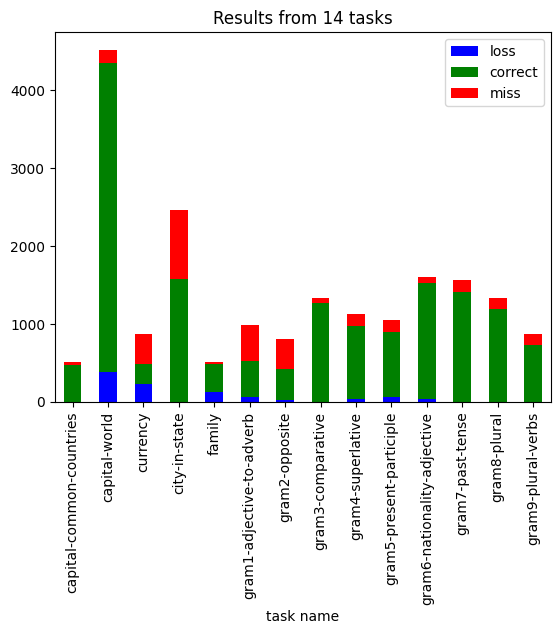

In [14]:
import numpy as np
import pandas as pd

# Let's channel inner R programming


dframe = pd.DataFrame([x for x in tasks],
                      columns = ['task name',
                                'loss',
                               'correct',
                                 'miss'])

dframe['accuracy'] = 100 * dframe['correct'] / (dframe['miss'] + dframe['loss'] + dframe['correct'])
print(dframe)

dframe[['task name', 'loss', 'correct', 'miss']].plot(x = 'task name',
                                              kind = 'bar',
                                              stacked = True,
                                              title = 'Results from 14 tasks',
                                              color={'loss': 'blue',
                                                    'correct': "green",
                                                    'miss': 'red',
                                                    })




## REFLECTION

* Fun task, needed a bit of problem solving
* KeyError was giving a headache
* I thought it was essential to count the loss count also to get full composition of data, i don't fully understand why it is giving it tho...
* Time spent 3 h